# CelebA Faces dataset

CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including

- 10,177 number of identities,
- 202,599 number of face images, and
- 5 landmark locations, 40 binary attributes annotations per image.

To download the CelebA dataset from the official source, follow these steps:

- Visit the official CelebA dataset website:
http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
- Scroll down to the "Download" section.
- Click the download link for the "Img/img_align_celeba.zip" file.
- Download and extract the contents to desired directory (e.g., ./CelebA).

In [1]:
# Import basic libraries
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils

import matplotlib.pyplot as plt
import math
from PIL import Image

In [2]:
# Configuration settings
BATCH_SIZE = 128
IMAGE_SIZE = 64
DATASET_PATH = './CelebA'

In [3]:
# Check if a GPU is available and set the device accordingly
if torch.accelerator.is_available():
    device = torch.accelerator.current_accelerator().type
else:
    device = "cpu"
print(f"Using {device} device")

Using mps device


In [4]:
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
dataset = torchvision.datasets.ImageFolder(DATASET_PATH, transform=transform)
dataloader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)

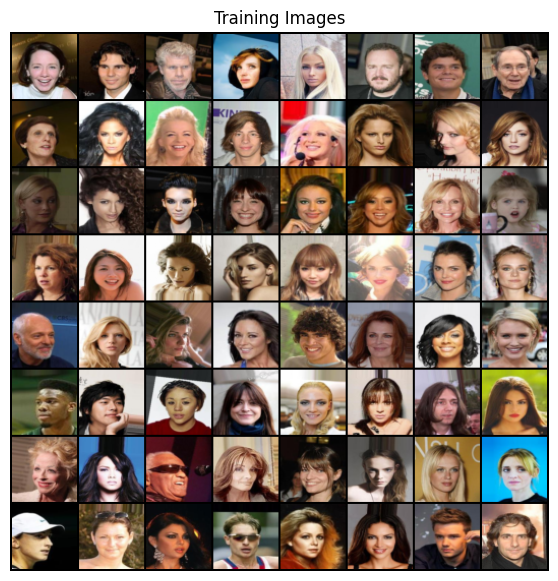

In [6]:
# Display a grid of training images from the CelebA dataset
real_batch = next(iter(dataloader))
images = real_batch[0].to(device)[:IMAGE_SIZE]  # Select first batch of images

plt.figure(figsize=(7, 7))
plt.axis("off")
plt.title("Training Images")
# Create a grid of images with padding and normalization, then convert for display
image_grid = vutils.make_grid(images, nrow=int(math.sqrt(IMAGE_SIZE)), padding=2, normalize=True)
plt.imshow(np.transpose(image_grid.cpu(), (1, 2, 0)))
plt.show()